In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load dataset
dataset = pd.read_csv('lstm_so2.csv')
dataset = dataset.fillna(dataset.mean())
data = dataset.values
data = data.astype('float32')


In [3]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [4]:
# Split data into training and testing sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

In [5]:
# Create function to create LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [6]:
# Reshape input data to be 3-dimensional
X_train = np.reshape(train, (train.shape[0], 1, train.shape[1]))
X_test = np.reshape(test, (test.shape[0], 1, test.shape[1]))

In [7]:
# Create and fit the LSTM model
model = create_model()
model.fit(X_train, train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
938/938 - 3s - loss: 0.0037 - 3s/epoch - 3ms/step
Epoch 2/100
938/938 - 1s - loss: 1.6210e-04 - 1s/epoch - 1ms/step
Epoch 3/100
938/938 - 1s - loss: 1.8662e-04 - 1s/epoch - 1ms/step
Epoch 4/100
938/938 - 1s - loss: 1.7277e-04 - 1s/epoch - 1ms/step
Epoch 5/100
938/938 - 1s - loss: 1.3781e-04 - 1s/epoch - 1ms/step
Epoch 6/100
938/938 - 1s - loss: 1.5536e-04 - 1s/epoch - 1ms/step
Epoch 7/100
938/938 - 1s - loss: 1.2824e-04 - 1s/epoch - 1ms/step
Epoch 8/100
938/938 - 1s - loss: 8.9943e-05 - 1s/epoch - 1ms/step
Epoch 9/100
938/938 - 1s - loss: 7.4682e-05 - 1s/epoch - 1ms/step
Epoch 10/100
938/938 - 1s - loss: 1.0848e-04 - 1s/epoch - 2ms/step
Epoch 11/100
938/938 - 1s - loss: 1.1810e-04 - 1s/epoch - 2ms/step
Epoch 12/100
938/938 - 1s - loss: 8.7850e-05 - 1s/epoch - 2ms/step
Epoch 13/100
938/938 - 2s - loss: 8.1690e-05 - 2s/epoch - 2ms/step
Epoch 14/100
938/938 - 1s - loss: 9.9559e-05 - 1s/epoch - 2ms/step
Epoch 15/100
938/938 - 1s - loss: 8.9057e-05 - 1s/epoch - 2ms/step
Epoch 16

In [9]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [10]:
train_predict = scaler.inverse_transform(train_predict)
train = scaler.inverse_transform(train)
test_predict = scaler.inverse_transform(test_predict)
test = scaler.inverse_transform(test)

In [11]:
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(train, train_predict))
test_rmse = np.sqrt(mean_squared_error(test, test_predict))
print('R2 Score_train:', r2_score(train, train_predict))
print('R2 Score_test:', r2_score(test, test_predict))

print('Train RMSE: %.2f' % train_rmse)
print('Test RMSE: %.2f' % test_rmse)

R2 Score_train: 0.9990074366625291
R2 Score_test: 0.9985365809548515
Train RMSE: 0.35
Test RMSE: 0.42


In [12]:
df=pd.DataFrame({'Actual':train.tolist(),'Predicted from lstm':train_predict.tolist()})
df.to_excel('lstm_SO2.xlsx')
df

,Actual,Predicted from lstm
0,[15.23729419708252],[14.90493106842041]
1,[15.23729419708252],[14.90493106842041]
2,[15.23729419708252],[14.90493106842041]
3,[15.23729419708252],[14.90493106842041]
4,[15.23729419708252],[14.90493106842041]
...,...,...
933,[22.84000015258789],[22.357019424438477]
934,[23.90999984741211],[23.409921646118164]
935,[24.5],[23.990875244140625]
936,[24.579999923706055],[24.069665908813477]


In [13]:
df=pd.DataFrame({'Actual':test.tolist(),'Predicted from lstm':test_predict.tolist()})
df.to_excel('lstm_SO2_test.xlsx')
df

,Actual,Predicted from lstm
0,[15.23729419708252],[14.90493106842041]
1,[15.23729419708252],[14.90493106842041]
2,[25.260000228881836],[24.73959732055664]
3,[25.649999618530273],[25.123973846435547]
4,[23.670000076293945],[23.17367935180664]
...,...,...
457,[15.23729419708252],[14.90493106842041]
458,[15.23729419708252],[14.90493106842041]
459,[15.23729419708252],[14.90493106842041]
460,[15.23729419708252],[14.90493106842041]


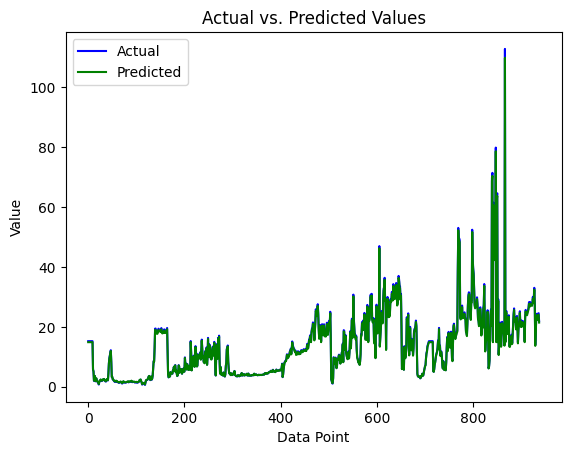

In [14]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(train))

# plot actual values as a blue line
plt.plot(x_values, train, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, train_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

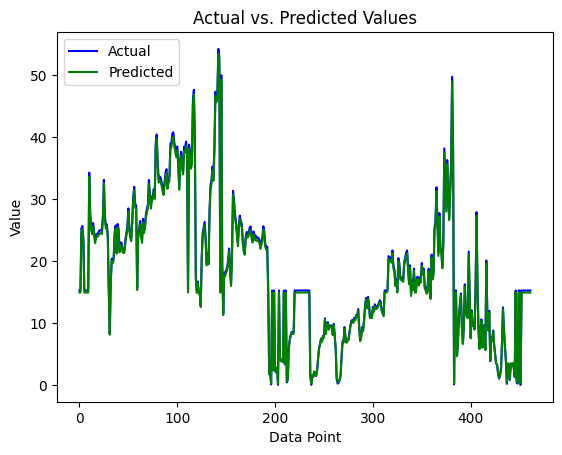

In [15]:
import matplotlib.pyplot as plt



# x-axis values (assuming 0-based indexing)
x_values = range(len(test))

# plot actual values as a blue line
plt.plot(x_values, test, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, test_predict, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()